In [1]:
import os, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Create timestamp to show when this summary was run
print 'Summary run: ' + time.strftime("%a, %d %b %Y %H:%M")

Summary run: Thu, 14 May 2020 14:36


In [3]:
relative_path = '../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"468,008,082","471,522,849","3,514,767",0.75%
HOV,"1,194,523","1,200,342","5,819",0.49%
Principal Arterial,"11,044,380","12,769,668","1,725,288",15.62%
Ramp,"352,596","291,996","-60,600",-17.19%
Total,"480,599,581","485,784,855","5,185,274",1.08%


----
### By County

In [6]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"338,145,881","335,993,824","-2,152,057",-0.64%
Pierce,"76,929,900","82,329,108","5,399,208",7.02%
Snohomish,"65,523,800","67,461,923","1,938,123",2.96%
Total,"480,599,581","485,784,855","5,185,274",1.08%


----
### Scatterplots 

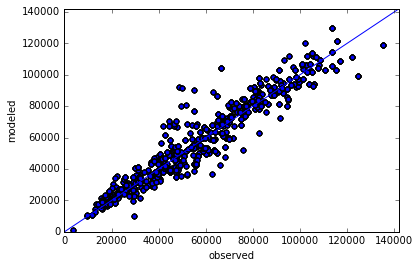

In [7]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2: ' + str(r_value)

r^2: 0.953064644494


---
By County

King r^2: 0.961725579673
Pierce r^2: 0.814970088051


Snohomish r^2: 0.985347950642


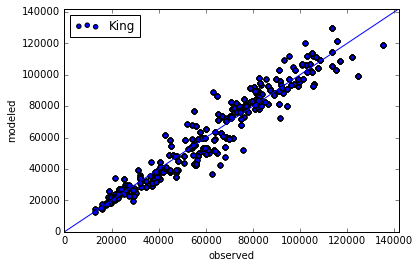

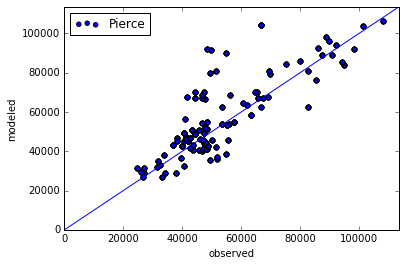

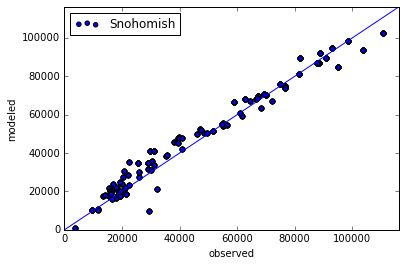

In [9]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print str(county) + ' r^2: ' + str(r_value)

---
By Facility Type

r^2 Freeway: 0.942210368182
r^2 Principal Arterial: 0.914784542771


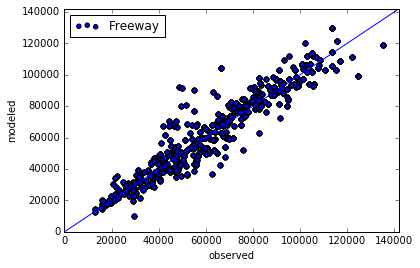

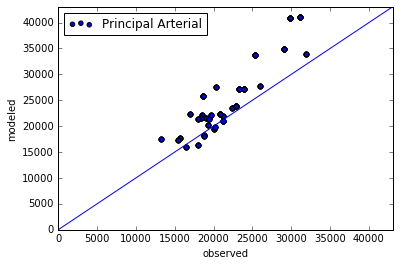

In [10]:
for factype in ['Freeway','Principal Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print 'r^2 ' + str(factype) + ': ' + str(r_value)

# Screenlines

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","545,219","-23,198",-4.08%
1,KENT,"550,322","499,385","-50,937",-9.26%
2,SEATTLE - SOUTH OF CBD,"526,500","498,586","-27,914",-5.30%
3,SHIP CANAL,"519,802","546,716","26,914",5.18%
4,KIRKLAND-REDMOND,"414,120","395,237","-18,883",-4.56%
5,MILL CREEK,"400,848","398,639","-2,209",-0.55%
6,SOUTH BELLEVUE,"399,500","361,854","-37,646",-9.42%
7,SEATTLE - NORTH,"372,000","374,868","2,868",0.77%
8,TACOMA - EAST OF CBD,"312,164","331,554","19,390",6.21%
9,PARKLAND,"304,322","278,276","-26,046",-8.56%


r^2 : 0.992563072273


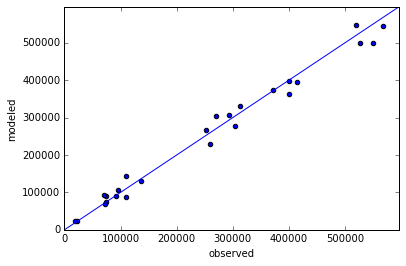

In [12]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

# Transit Boarding
----
### By Agency

In [13]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_5to20', ascending=False)

,agency,observed_5to20,modeled_5to20,diff,perc_diff
2,King County Metro,"392,694","648,043","255,349",65.02%
5,Sound Transit,"145,426","143,914","-1,511",-1.04%
0,Community Transit,"30,918","65,415","34,497",111.58%
4,Pierce Transit,"27,233","77,278","50,045",183.76%
6,Washington Ferries,"16,912","1,591","-15,321",-90.59%
3,Kitsap Transit,"7,638","18,763","11,125",145.65%
1,Everett Transit,"3,290","5,157","1,866",56.72%


----
### Key Routes
#### Ferries

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')

df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,POF West Seattle - S,"1,356","2,348",992,73.17%
1,POF Vashon Island -,670,12,-658,-98.25%
2,WSF Kingston - Edmon,"1,732",260,"-1,473",-85.01%
3,WSF Bainbridge Islan,"8,857",619,"-8,237",-93.01%
4,WSF Bremerton - Seat,"4,484",260,"-4,224",-94.20%
5,WSF Fauntleroy - Sou,365,7,-358,-98.03%
6,WSF Vashon Island -,946,363,-583,-61.61%
7,WSF Southworth - Vas,239,39,-200,-83.85%
8,WSF Point Defiance -,289,43,-246,-85.09%


r^2 : 0.138168570331


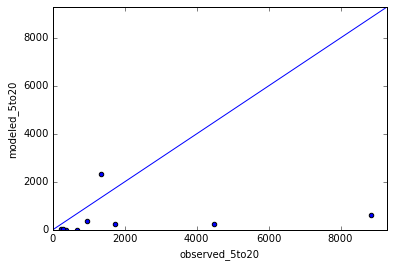

In [15]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print 'r^2 ' + str('') + ': ' + str(r_value)

#### Rail

In [16]:
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,Link Red Line,"69,383","55,174","-14,209",-20.48%
1,Sounder South,"15,356","4,832","-10,524",-68.53%
2,Sounder North,"1,667",893,-773,-46.40%


r^2 : 0.991916133656


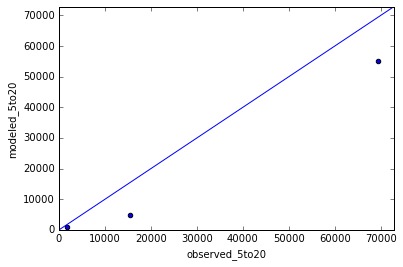

In [17]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print 'r^2 ' + str('') + ': ' + str(r_value)

#### RapidRide, Busiest Buses, Streetcar

In [18]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,observed_5to20,modeled_5to20,diff,perc_diff
6,E Line RapidRide,"15,336","26,460","11,124",72.54%
1,KC Metro 40,"11,405","20,628","9,223",80.87%
5,D Line RapidRide,"13,078","19,961","6,883",52.63%
4,C Line RapidRide,"11,368","17,124","5,756",50.63%
10,Sound Transit 550,"9,168","15,679","6,512",71.03%
0,KC Metro 7,"10,150","14,966","4,816",47.45%
2,A Line RapidRide,"8,522","12,012","3,490",40.95%
7,F Line RapidRide,"5,267","10,289","5,022",95.35%
3,B Line RapidRide,"5,914","10,031","4,117",69.62%
9,First Hill Streetcar,"3,586","1,773","-1,814",-50.57%


r^2 : 0.973078826112


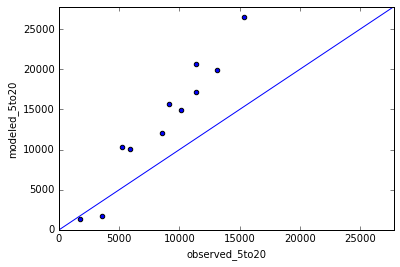

In [19]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print 'r^2 ' + str('') + ': ' + str(r_value)

---
### Lines by Agency

r^2 Community Transit: 0.852834578489
r^2 Everett Transit: -0.331620839976
r^2 King County Metro: 0.959493779028
r^2 Kitsap Transit: 0.712569575126


r^2 Pierce Transit: 0.952129750483
r^2 Sound Transit: 0.962334500448
r^2 Washington Ferries: 0.852558804514


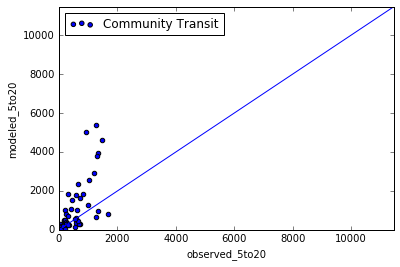

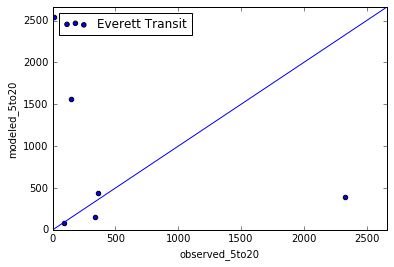

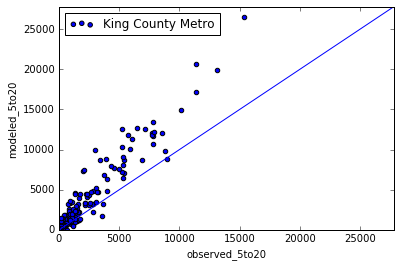

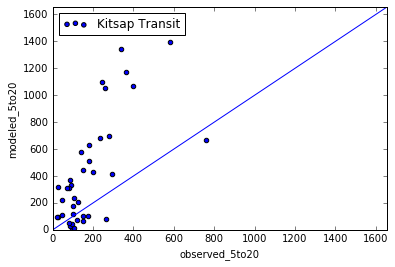

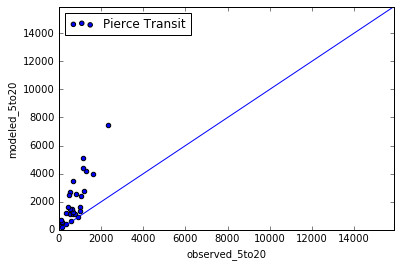

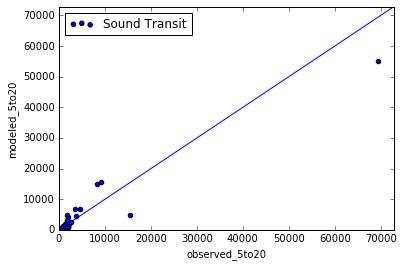

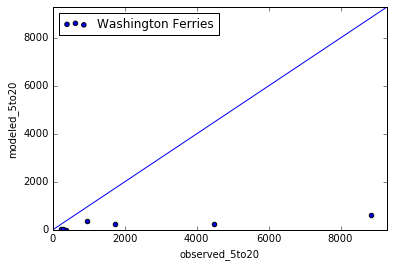

In [20]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print 'r^2 ' + str(agency) + ': ' + str(r_value)

# Light Rail Station Boardings
----
Red Line

In [21]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,
Husky Stadium,"9,416","7,269","-2,146",-22.80%
Westlake,"10,904","6,091","-4,813",-44.14%
University St,"5,257","4,352",-905,-17.21%
Pioneer Square,"3,865","3,505",-360,-9.33%
Int'l District,"5,647","3,412","-2,235",-39.58%
Capitol Hill,"7,016","6,798",-218,-3.11%
Stadium,"1,912",559,"-1,353",-70.77%
SODO,"2,108","2,963",855,40.58%
Beacon Hill,"2,587","1,624",-963,-37.22%


Sound Transit Station Groupings

In [22]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","7,269","-2,146",-22.80%
Capitol Hill,"7,016","6,798",-218,-3.11%
Westlake/University St,"16,161","10,443","-5,718",-35.38%
Pioneer Square/Int'l District,"9,512","6,917","-2,596",-27.29%
Stadium/SODO,"4,020","3,522",-498,-12.39%
Beacon Hill/Mount Baker,"4,809","3,635","-1,174",-24.41%
Columbia City,"2,376","1,719",-657,-27.64%
Othello/Rainier Beach,"4,412","4,078",-334,-7.57%
Tukwila Int'l Blvd,"2,779","2,639",-140,-5.02%


# Stop Transfers

### Light Rail

In [23]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.36,-99.00,99.36,-100.36%
Westlake,0.36,0.36,-0.00,-0.16%
University St,0.60,0.20,0.40,200.18%
Pioneer Square,0.56,0.16,0.40,250.19%
Int'l District,0.52,0.45,0.07,15.59%
Capitol Hill,0.07,-99.00,99.07,-100.07%
Stadium,0.41,0.12,0.29,246.03%
SODO,0.47,0.31,0.16,49.54%
Beacon Hill,0.33,0.35,-0.03,-7.83%


# Externals

In [24]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,observed,modeled,diff,percent_diff
location,,,,,
I-5 to Olympia,3733,"130,000","140,294","10,294",7.92%
I-5 to Mount Vernon,3744,"67,000","62,694","-4,306",-6.43%
I-90 @ Snoqualmie Pass,3739,"33,000","31,813","-1,187",-3.60%
SR-532 to Camano Island,3746,"23,000","21,591","-1,409",-6.13%
SR-507 to Yelm,3734,"23,000","21,640","-1,360",-5.91%
SR-3 to Belfair,3749,"18,000","17,997",-3,-0.02%
Hood Canal Bridge,3748,"18,000","17,754",-246,-1.36%
SR-530 N/O Stanwood,3745,"9,100","8,960",-140,-1.54%
Mukilteo-Clinton Ferry,3747,"6,300","6,648",348,5.52%


# Corridor Speed

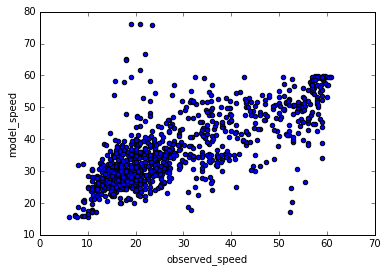

In [25]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

In [26]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
7,Seattle to Everett - NB,43,58
16,Everett to Seattle - SB,28,28
25,Tacoma to Seattle - NB,29,26
34,Seattle to Tacoma - SB,44,59
43,Bellevue to Lynnwood - NB,47,56
52,Lynnwood to Bellevue - SB,28,24
61,Tukwila to Bellevue - NB,27,19
70,Bellevue to Tukwila - SB,30,44
79,Auburn to Renton - NB,32,24
88,Renton to Auburn - SB,50,55


### PM Peak, Primary Corridors

In [27]:

df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
2,Seattle to Everett - NB,29,24
11,Everett to Seattle - SB,39,28
20,Tacoma to Seattle - NB,42,42
29,Seattle to Tacoma - SB,33,27
38,Bellevue to Lynnwood - NB,32,24
47,Lynnwood to Bellevue - SB,42,41
56,Tukwila to Bellevue - NB,31,32
65,Bellevue to Tukwila - SB,27,20
74,Auburn to Renton - NB,49,44
83,Renton to Auburn - SB,34,32
